In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In [15]:
def get_data(stocks, start, end):
    stockData = yf.download(
        stocks,
        start=start,
        end=end,
        auto_adjust=True,
        progress=False
    )['Close']
    
    returns = stockData.pct_change().dropna()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    
    return meanReturns, covMatrix

In [17]:
stock_list = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
stocks = [stock for stock in stock_list]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*3)

In [18]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

In [34]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

# Monte Carlo  Method to simulate portfolio performance
num_simultations = 10000
T = 252
meanMatrix = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanMatrix = meanMatrix.T

portfolio_simulations = np.full(shape=(T, num_simultations), fill_value=0.0)

initialPortfolioValue = 10000

for m in range(0,num_simultations):
    Z = np.random.normal(size = (T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanMatrix + np.inner(L, Z)
    portfolio_simulations[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialPortfolioValue

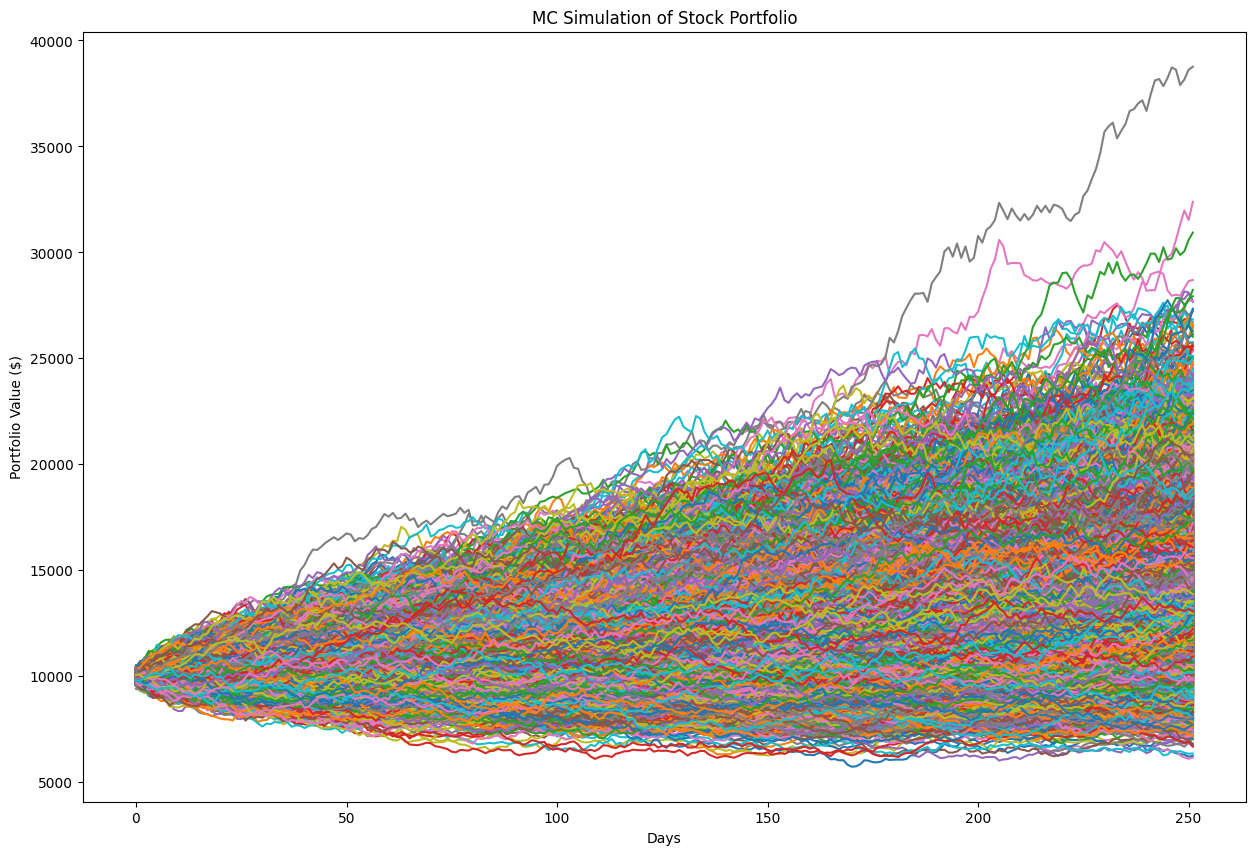

In [35]:
plt.figure(figsize=(15,10))  
plt.plot(portfolio_simulations)
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.title('MC Simulation of Stock Portfolio')
plt.show()
